1. Data yang saya ambil dalam website traveloka yaitu nama apartemen, harga, rating, lokasi dan URL. Penggunaan
 #Data dalam aplikasi dunia nyata yaitu :
- Sebagai Data riwayat pencarian dan referensi pengguna untuk merekomendasi tempat sesuai kebutuhan
- Data digunakan juga sebagai penawaran terbaik.
- Data ini membantu Traveloka untuk memahami dari preferensi pengguna untuk menyesuaikan penawaran mereka.
- Penggunaan data ini juga membantu Traveloka menyelesaikan masalah pelanggan dengan lebih cepat dan efisien. selain itu data riwayat juga digunakan untuk memberikan layanan pelanggan lebih personal.

#Keuntungan menyimpan data di database PostgreSQL:
- Keamanan: PostgreSQL adalah database yang aman dan andal yang dapat melindungi data pengguna dari akses yang tidak sah.
- Skalabilitas: PostgreSQL dapat menangani volume data yang besar dan dapat diskalakan untuk memenuhi kebutuhan bisnis yang terus berkembang.
- Kecepatan: PostgreSQL adalah database yang cepat dan efisien yang dapat memproses permintaan data dengan cepat.
- Keandalan: PostgreSQL adalah database yang andal yang dapat diandalkan untuk menyediakan data yang akurat dan konsisten.
- Fitur SQL: PostgreSQL mendukung bahasa SQL standar, yang memungkinkan pengembang untuk mengakses dan memanipulasi data dengan mudah.

2. Tampilan hasil scraping 

In [77]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', None)

url = "https://www.traveloka.com/id-id/accommodation/apartment/indonesia/region/jakarta-102813"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [18]:
from bs4 import BeautifulSoup
import requests
import csv

def scrape_apartment_data(url):
    """
    Mengumpulkan data akomodasi apartemen dari URL Traveloka.

    Args:
        url (str): URL halaman web Traveloka yang berisi data apartemen.

    Returns:
        list: Daftar data apartemen dalam bentuk dictionary.
    """

    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes

    soup = BeautifulSoup(response.content, 'html.parser')

    apartments = []
    apartment_containers = soup.find_all('div', class_='css-1dbjc4n r-14lw9ot r-awg2lu r-1dzdj1l r-rs99b7 r-18u37iz r-1jbys1g r-1udh08x')

    for container in apartment_containers:
        apartment_data = {}

        # Nama Apartemen
        name_element = container.find('h3', class_='css-4rbku5 css-901oao css-cens5h r-a5wbuh r-ubezar r-1kfrs79 r-rjixqe r-fdjqy7')
        apartment_data['nama'] = name_element.text.strip() if name_element else None

        # Harga
        price_element = container.find('div', class_='css-901oao r-a5wbuh r-1kfrs79')
        apartment_data['harga'] = price_element.text.strip() if price_element else None

        # Rating
        rating_element = container.find('div', class_='css-1dbjc4n r-1awozwy r-18u37iz r-1h0z5md')
        apartment_data['rating'] = rating_element.text.strip() if rating_element else None

        # Lokasi
        location_element = container.find('div', class_='css-1dbjc4n r-1habvwh r-18u37iz r-1h0z5md')
        apartment_data['lokasi'] = location_element.text.strip() if location_element else None

        # URL Apartemen
        link_element = container.find('a', class_='css-4rbku5 r-6koalj r-eqz5dr')
        apartment_data['url'] = link_element['href'] if link_element else None

        apartments.append(apartment_data)

    return apartments

# URL halaman web Traveloka yang ingin di scrape
url = 'https://www.traveloka.com/id-id/accommodation/apartment/indonesia/region/jakarta-102813'

apartment_data = scrape_apartment_data(url)

# Menampilkan hasil scraping dalam bentuk tabel
print("Data Apartemen:")
print("---------------")
for apartment in apartment_data:
    print(f"Nama: {apartment['nama']}")
    print(f"Harga: {apartment['harga']}")
    print(f"Rating: {apartment['rating']}")
    print(f"Lokasi: {apartment['lokasi']}")
    print(f"URL: {apartment['url']}")
    print("-------------------------------------------------------------------------------")


# Menulis data ke file CSV
with open('apartment_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['nama', 'harga', 'rating', 'lokasi', 'url']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for apartment in apartment_data:
        writer.writerow(apartment)


Data Apartemen:
---------------
Nama: Ascott Jakarta
Harga: Rp 2.103.523
Rating: 8.7 (3.809) Mengesankan
Lokasi: Thamrin, Jakarta Pusat
URL: /id-id/hotel/indonesia/ascott-jakarta--108582
-------------------------------------------------------------------------------
Nama: Somerset Sudirman Jakarta
Harga: Rp 1.257.667
Rating: 9 (769) Mengesankan
Lokasi: Karet Tengsin, Tanah Abang
URL: /id-id/hotel/indonesia/somerset-sudirman-jakarta-9000000971406
-------------------------------------------------------------------------------
Nama: Ascott Sudirman Jakarta
Harga: Rp 1.950.449
Rating: 8.6 (2.390) Mengesankan
Lokasi: Karet Semanggi, Setiabudi
URL: /id-id/hotel/indonesia/ascott-sudirman-jakarta-3000020014445
-------------------------------------------------------------------------------
Nama: Ra Suites Simatupang
Harga: Rp 1.130.609
Rating: 8.9 (432) Mengesankan
Lokasi: Cilandak Barat, Cilandak
URL: /id-id/hotel/indonesia/ra-suites-simatupang-9000001043096
-----------------------------------

3. Setelah data berhasil di-scrape, lakukan transformasi yang diperlukan seperti
pembersihan data (misalnya menghapus simbol-simbol tertentu dari harga),
normalisasi data, atau penggabungan data jika diperlukan. 

In [20]:
from bs4 import BeautifulSoup
import requests
import re

def scrape_apartment_data(url):
    """
    Mengumpulkan data akomodasi apartemen dari URL Traveloka.

    Args:
        url (str): URL halaman web Traveloka yang berisi data apartemen.

    Returns:
        list: Daftar data apartemen dalam bentuk dictionary.
    """

    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes

    soup = BeautifulSoup(response.content, 'html.parser')

    apartments = []
    apartment_containers = soup.find_all('div', class_='css-1dbjc4n r-14lw9ot r-awg2lu r-1dzdj1l r-rs99b7 r-18u37iz r-1jbys1g r-1udh08x')

    for container in apartment_containers:
        apartment_data = {}

        # Nama Apartemen
        name_element = container.find('h3', class_='css-4rbku5 css-901oao css-cens5h r-a5wbuh r-ubezar r-1kfrs79 r-rjixqe r-fdjqy7')
        apartment_data['nama'] = name_element.text.strip() if name_element else None

        # Harga
        price_element = container.find('div', class_='css-1dbjc4n r-3mtglp')
        price_text = price_element.text.strip() if price_element else None
        if price_text:
            # Extract only the numerical part of the price using a regular expression
            price_match = re.search(r"(\d+\.\d+)", price_text)  
            apartment_data['harga'] = int(float(price_match.group(1).replace('.', ''))) if price_match else None # Convert the extracted price to integer
        else:
            apartment_data['harga'] = None

        # Rating
        rating_element = container.find('div', class_='css-1dbjc4n r-1awozwy r-18u37iz r-1h0z5md')
        if rating_element:
            # Extract only the numerical part of the rating using a regular expression
            rating_match = re.search(r"(\d+\.\d+)", rating_element.text.strip()) 
            apartment_data['rating'] = float(rating_match.group(1)) if rating_match else None
        else:
            apartment_data['rating'] = None

        # Lokasi
        location_element = container.find('div', class_='css-1dbjc4n r-1habvwh r-18u37iz r-1h0z5md')
        apartment_data['lokasi'] = location_element.text.strip() if location_element else None

        # URL Apartemen
        link_element = container.find('a', class_='css-1dbjc4n r-1awozwy r-18u37iz r-1h0z5md')
        apartment_data['url'] = link_element['href'] if link_element else None

        apartments.append(apartment_data)

    return apartments

# URL halaman web Traveloka yang ingin di scrape
url = 'https://www.traveloka.com/id-id/accommodation/apartment/indonesia/region/jakarta-102813'

apartment_data = scrape_apartment_data(url)

# Menampilkan data apartemen yang telah dibersihkan
for apartment in apartment_data:
    print(f"Nama: {apartment['nama']}")
    print(f"Harga: {apartment['harga']}")
    print(f"Rating: {apartment['rating']}")
    print(f"Lokasi: {apartment['lokasi']}")
    print(f"URL: {apartment['url']}")
 

Nama: Ascott Jakarta
Harga: 2103
Rating: 8.7
Lokasi: Thamrin, Jakarta Pusat
URL: None
Nama: Somerset Sudirman Jakarta
Harga: 1257
Rating: None
Lokasi: Karet Tengsin, Tanah Abang
URL: None
Nama: Ascott Sudirman Jakarta
Harga: 1950
Rating: 8.6
Lokasi: Karet Semanggi, Setiabudi
URL: None
Nama: Ra Suites Simatupang
Harga: 1130
Rating: 8.9
Lokasi: Cilandak Barat, Cilandak
URL: None
Nama: Ascott Kuningan Jakarta
Harga: 2320
Rating: 8.7
Lokasi: Kuningan, Setiabudi
URL: None
Nama: Oakwood Apartments PIK Jakarta (Pantai Indah Kapuk)
Harga: 1938
Rating: 8.2
Lokasi: Kamal Muara, Penjaringan
URL: None
Nama: Citadines Sudirman Jakarta
Harga: 1354
Rating: 9.1
Lokasi: Karet Semanggi, Setiabudi
URL: None
Nama: Ra Premiere Simatupang
Harga: 843076
Rating: 8.6
Lokasi: Cilandak Barat, Cilandak
URL: None
Nama: The Ritz-Carlton Jakarta, Pacific Place Residences
Harga: 3934
Rating: 8.7
Lokasi: Sudirman Central Business District, Senayan
URL: None
Nama: Somerset Berlian Jakarta
Harga: 1498
Rating: 8.7
Lokasi

4. Buatlah database di PostgreSQL dan tabel untuk menyimpan data hasil scraping.


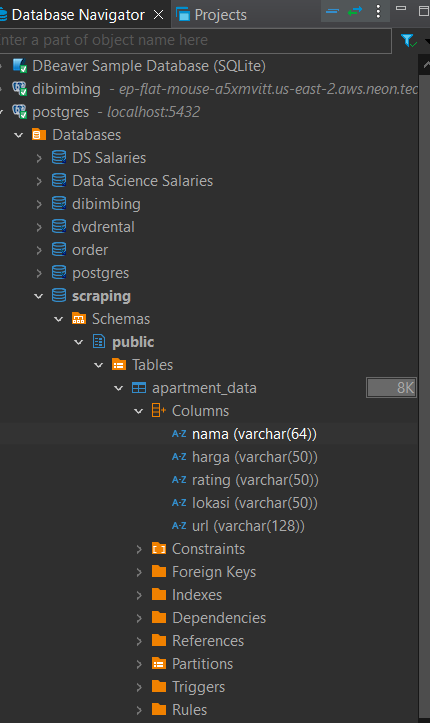

5. Setelah data disimpan, lakukan query sederhana untuk menarik data dari
PostgreSQL dan tampilkan beberapa contoh hasil query tersebut. 

-- Select All (*)
select * from apartment_data ad ;
select nama, harga, rating, lokasi, url from apartment_data ad ;

select * from apartment_data ad ; 
select nama, lokasi, url from apartment_data ad ;

select * from apartment_data ad ;
select nama, lokasi from apartment_data ad ;

select * from apartment_data ad ;
select nama, harga from apartment_data ad ;


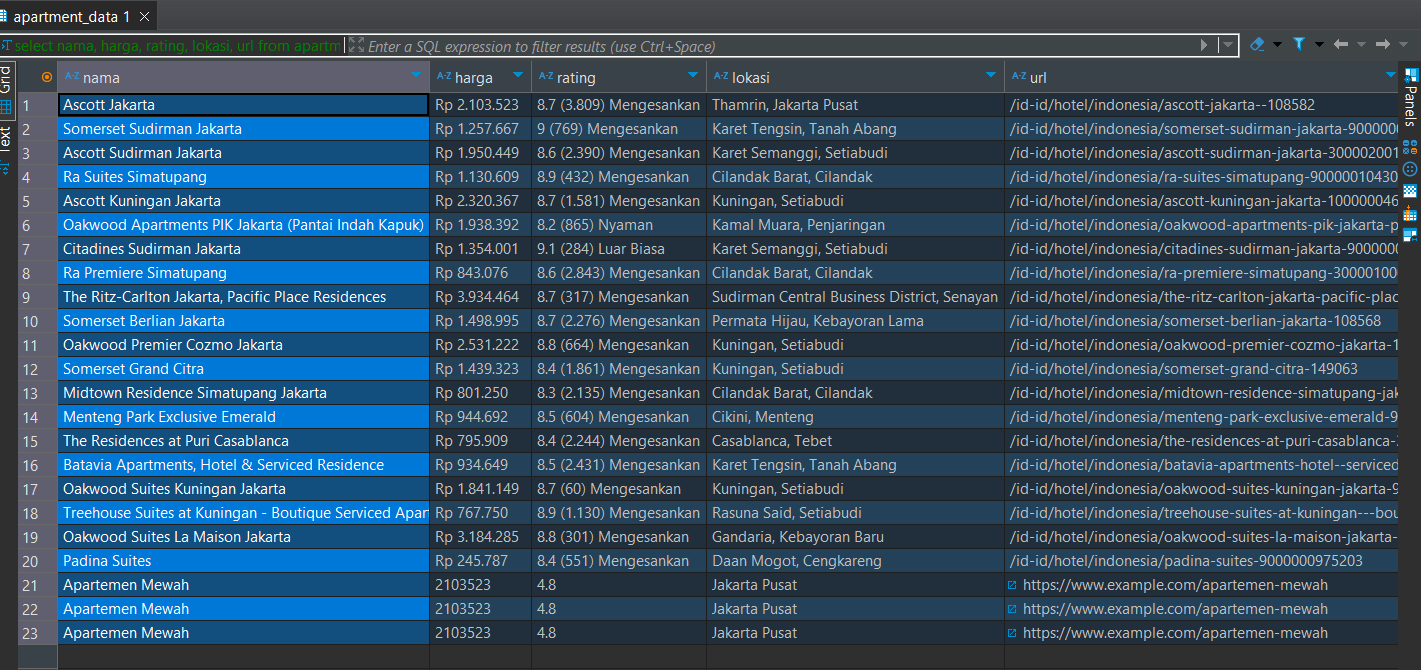

![alt text](image-1.png)

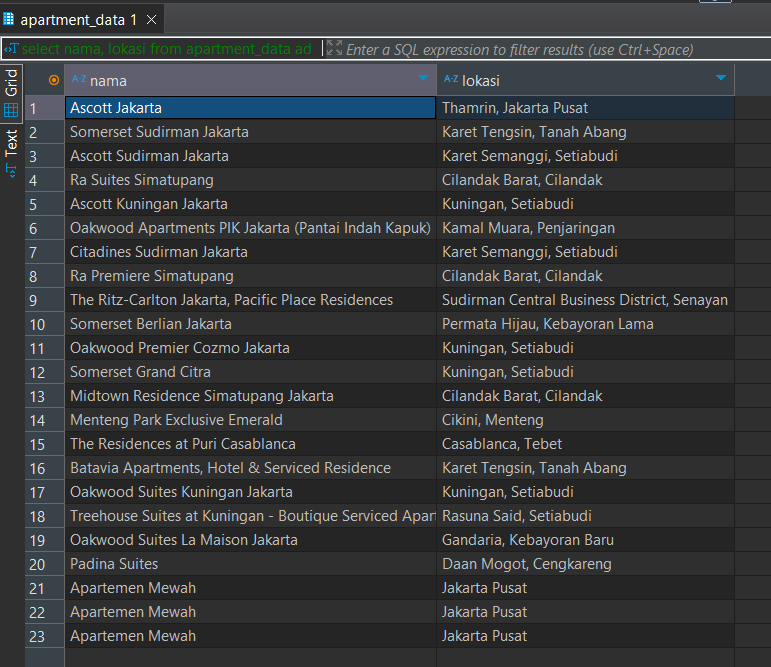

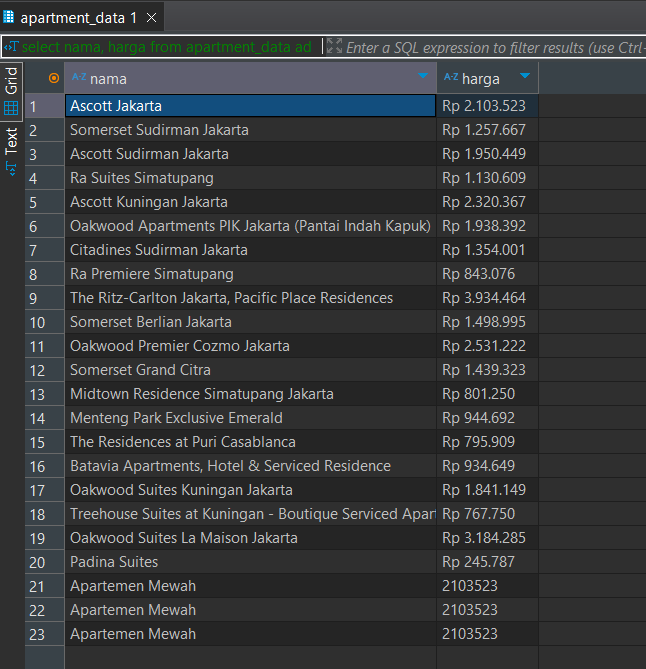